In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import mplfinance as mpf
import datetime

from tqdm.notebook import tqdm

sns.set()

In [3]:
def bar_create(ticks,what = 'Volume',th=5):
    df = ticks.copy()
    group = pd.Series(index = df.index, dtype = float, name = 'group')
    N = len(group)

    t = df[what] #100*np.log(ohlc['Close']/ohlc['Open'])
    ts = 0
    idx = []

    for i, x in tqdm(enumerate(t)):
        ts += x
        if np.abs(ts) > th:
            idx.append(i)
            ts = 0.0
            continue

    group.iloc[idx]  = idx
    group.fillna(method = 'bfill',inplace = True)
    group.fillna(method = 'ffill',inplace = True)

    df.loc[:,'group'] = group
    df.loc[:,'Time'] = df.index

    fTime = df.groupby('group')['Time'].first()
    lTime = df.groupby('group')['Time'].last()
    Time_ = pd.concat([fTime,lTime],axis = 1)
    Time_.columns = ['open','close']
    Time_.index = Time_.close
    Time_.loc[:,'dt'] = (Time_.close-Time_.open).dt.total_seconds()


    Open = df.groupby('group')['open'].first().rename('open')
    High = df.groupby('group')['high'].max().rename('high')
    Low = df.groupby('group')['low'].min().rename('low')
    Close = df.groupby('group')['close'].last().rename('close')
    Volume = df.groupby('group')['volume'].sum().rename('volume')
    
    newOhlc = pd.concat([Open,High,Low,Close,Volume],axis = 1)
    newOhlc.index = lTime
    return newOhlc,group


In [4]:
data = pd.read_csv('/Users/orentapiero/Data/bitmex_BTCUSD_1m.csv')
data.index = pd.to_datetime(data['time'],unit = 's')
del data['time']
data = data.loc[:'2019']

In [5]:
newOhlc,group = bar_create(data,what = 'volume',th=50000000)

0it [00:00, ?it/s]

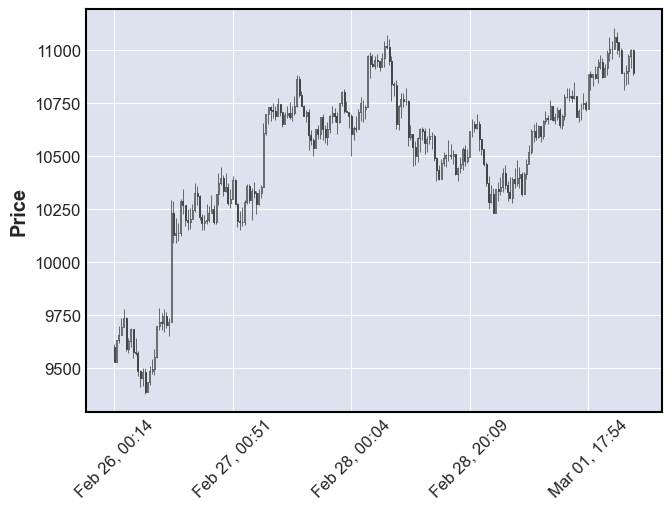

In [7]:
mpf.plot(newOhlc.loc['2018-02-26':'2018-03-01'],type = 'candle')

In [117]:
newOhlc.loc['2018-02-26']

,open,high,low,close,volume
Time,,,,,
2018-02-26 00:14:00,9601.0,9615.0,9529.0,9529.5,50599121
2018-02-26 01:03:00,9529.5,9633.0,9529.0,9631.5,50866623
2018-02-26 01:47:00,9631.5,9699.0,9619.0,9657.0,50033441
2018-02-26 02:24:00,9657.0,9737.0,9655.0,9694.5,50211122
2018-02-26 02:59:00,9694.5,9780.0,9693.0,9736.0,50431226
2018-02-26 03:40:00,9736.0,9740.0,9581.0,9589.5,51656767
2018-02-26 04:16:00,9589.5,9640.0,9573.0,9629.5,50532478
2018-02-26 04:59:00,9629.5,9691.0,9601.0,9684.5,50542104
2018-02-26 05:41:00,9684.5,9685.0,9549.5,9577.5,50520901
